# Ataque por exracción
---

#### RobertoFigueroa, Michele Benvenuto, Gustavo Méndez
Universidad Del Valle de Guatemala \
Security Data Science \
Proyecto 3 

---

### Modelo Original

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, 
    MaxPooling2D,
    Dense,
    Rescaling,
    Flatten,
    Dropout
)

from keras.models import Sequential

from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    plot_confusion_matrix, 
    accuracy_score
)

from art.estimators.classification import KerasClassifier
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
if tf.executing_eagerly():
    tf.compat.v1.disable_eager_execution()

In [42]:
from art.utils import load_mnist

In [88]:
(x_train, y_train), (x_test0, y_test0), _, _ = load_mnist()

In [89]:
y_train.shape

(60000, 10)

In [3]:
def get_train_test(data_dir, batch_size=32, img_height=64, img_width=64):
    
    ig = tf.keras.preprocessing.image.ImageDataGenerator()
    data = ig.flow_from_directory(directory=data_dir, 
                                     target_size=(img_height, img_width), 
                                     batch_size=batch_size,
                                     seed=123)

    X, y = data.next()
    
    return X, y

In [39]:
def load_model(img_height, img_width, num_classes):
    model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes)
    ])
    
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="adam",
                                                                  metrics=['accuracy'])
    
    return model

In [5]:
def get_metrics(y_val, predictions, model_name):
    conf_matrix = confusion_matrix(y_val, predictions, labels=list(range(1,26)))
    accu = accuracy_score(y_val, predictions)
    _recall_score = recall_score(y_val, predictions, average='weighted')
    _precision_score = precision_score(y_val, predictions, average='weighted')
    _f1_score = f1_score(y_val, predictions, average='weighted')

    print(f"\n---Metrics for {model_name}---")
    #print("\n Confusion Matrix\n", conf_matrix)
    print("\n Accuracy", accu)
    print("\n Precision", _precision_score)
    print("\n Recall", _recall_score)
    print("\n F1 Score", _f1_score)
    
    return conf_matrix


#### Entrenamiento Modelo Original

In [6]:
DIR = './data/malimg_paper_dataset_imgs/' 
batch_size=9339
img_height=64
img_width=64
X, y = get_train_test(DIR, batch_size, img_height, img_width)

Found 9339 images belonging to 25 classes.


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=79)

In [36]:
print(X_test.shape)
print(y_test.shape)

(1868, 64, 64, 3)
(1868, 25)


In [9]:
model = load_model(img_height, img_width, y.shape[1])

2022-05-23 22:58:47.813264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 22:58:47.813703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-23 22:58:47.813777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-23 22:58:47.813843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-23 22:58:47.815678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [11]:
epochs=10
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=epochs,
    batch_size=32
)

Train on 7471 samples
Epoch 1/10


2022-05-23 22:58:48.165388: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


7471/7471 [==============================] - 18s 2ms/sample - loss: 1.0556 - accuracy: 0.6784
Epoch 2/10
7471/7471 [==============================] - 17s 2ms/sample - loss: 0.2343 - accuracy: 0.9371
Epoch 3/10
7471/7471 [==============================] - 17s 2ms/sample - loss: 0.1371 - accuracy: 0.9598
Epoch 4/10
7471/7471 [==============================] - 17s 2ms/sample - loss: 0.1107 - accuracy: 0.9627
Epoch 5/10
7471/7471 [==============================] - 17s 2ms/sample - loss: 0.0901 - accuracy: 0.9697
Epoch 6/10
7471/7471 [==============================] - 17s 2ms/sample - loss: 0.0643 - accuracy: 0.9779
Epoch 7/10
7471/7471 [==============================] - 21s 3ms/sample - loss: 0.0423 - accuracy: 0.9859
Epoch 8/10
7471/7471 [==============================] - 16s 2ms/sample - loss: 0.0289 - accuracy: 0.9902
Epoch 9/10
7471/7471 [==============================] - 16s 2ms/sample - loss: 0.0237 - accuracy: 0.9914
Epoch 10/10
7471/7471 [==============================] - 16s 2ms/s

#### Pruebas modelo original

In [22]:
print(model.evaluate(X_test, y_test))

[0.05460656037849795, 0.9828694]


### Robo de modelo

In [23]:
# Documentation: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/extraction.html#copycat-cnn
# Ref: https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/model-stealing-demo.ipynb
from art.attacks import ExtractionAttack
from art.attacks.extraction import CopycatCNN, KnockoffNets

In [43]:
num_epochs = 10
len_steal = 1600

In [25]:
og_model = KerasClassifier(model)

In [44]:
attack_catalogue = {"Probabilistic CopycatCNN": CopycatCNN(classifier=og_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN": CopycatCNN(classifier=og_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets": KnockoffNets(classifier=og_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets": KnockoffNets(classifier=og_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                   }

In [45]:
results = []
for len_steal in [25, 50, 200, 500, 1000, 1600]:
    indices = np.random.permutation(len(X_test))
    x_steal = X_test[indices[:len_steal]]
    y_steal = y_test[indices[:len_steal]]
    _x_test = X_test[indices[len_steal:]]
    _y_test = y_test[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = load_model(img_height, img_width, y.shape[1])
        classifier_stolen = KerasClassifier(model_stolen)
        classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)
        acc = classifier_stolen._model.evaluate(_x_test, _y_test)[1]
        print(name, ":", acc)
        results.append((name, len_steal, acc))

Train on 25 samples
Epoch 1/10
25/25 [==============================] - 0s 12ms/sample - loss: -274.5741 - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 3ms/sample - loss: -331.4222 - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 3ms/sample - loss: -436.7187 - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 3ms/sample - loss: -652.9750 - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 3ms/sample - loss: -1030.6742 - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 3ms/sample - loss: -1640.0073 - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 3ms/sample - loss: -2525.7041 - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 3ms/sample - loss: -3774.0903 - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 3ms/sample - loss: -5544.6089 - accuracy: 0.0000e+00
Epoch 10/10

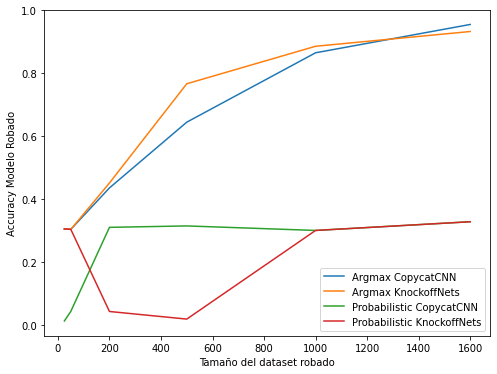

In [46]:
df = pd.DataFrame(results, columns=('Nombre del método', 'Tamaño del dataset robado', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Tamaño del dataset robado")
ax.set_ylabel("Accuracy Modelo Robado")
for name, group in df.groupby("Nombre del método"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()